In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%run functions.ipynb

In [3]:
heart = pd.read_csv('framingham.csv')
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
male               4238 non-null int64
age                4238 non-null int64
education          4133 non-null float64
currentSmoker      4238 non-null int64
cigsPerDay         4209 non-null float64
BPMeds             4185 non-null float64
prevalentStroke    4238 non-null int64
prevalentHyp       4238 non-null int64
diabetes           4238 non-null int64
totChol            4188 non-null float64
sysBP              4238 non-null float64
diaBP              4238 non-null float64
BMI                4219 non-null float64
heartRate          4237 non-null float64
glucose            3850 non-null float64
TenYearCHD         4238 non-null int64
dtypes: float64(9), int64(7)
memory usage: 529.8 KB


In [5]:
heart.shape

(4238, 16)

In [6]:
heart.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
heart.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
heart_fill = heart

In [9]:
heart_fill["cigsPerDay"].fillna(heart_fill.groupby("currentSmoker")["cigsPerDay"].transform("mean"), inplace=True)

In [10]:
heart_fill["BPMeds"].fillna(heart_fill.groupby("prevalentHyp")["BPMeds"].transform('median'), inplace=True)

In [11]:
heart_fill["totChol"].fillna(heart_fill.groupby("prevalentStroke")["totChol"].transform("mean"), inplace=True)

In [12]:
heart_fill["BMI"].fillna(heart_fill.groupby("age")["BMI"].transform("mean"), inplace=True)

In [13]:
heart_fill["heartRate"].fillna(heart_fill.groupby("sysBP")["heartRate"].transform("mean"), inplace=True)

In [14]:
heart_fill["glucose"].fillna(heart_fill.groupby("diabetes")["glucose"].transform("mean"), inplace=True)

In [15]:
heart_fill["education"].fillna(heart_fill.groupby("age")["education"].transform("mean"), inplace=True)

In [16]:
heart_fill.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [17]:
heart_fill.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Check For Correlation between attributes.

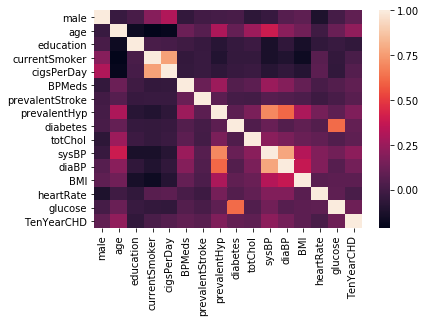

In [18]:
sns.heatmap(heart_fill.corr())

In [19]:
heart_fill.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017374,0.197596,0.316723,-0.051545,-0.004546,0.005313,0.015708,-0.069974,-0.035989,0.057933,0.081360,-0.116530,0.007070,0.088428
age,-0.028979,1.000000,-0.168023,-0.213748,-0.192113,0.120955,0.057655,0.307194,0.101258,0.260270,0.394302,0.206104,0.136934,-0.012716,0.115089,0.225256
education,0.017374,-0.168023,1.000000,0.019839,0.009392,-0.010748,-0.035054,-0.081672,-0.039031,-0.023047,-0.129428,-0.061637,-0.136731,-0.052922,-0.033518,-0.053798
currentSmoker,0.197596,-0.213748,0.019839,1.000000,0.770799,-0.048358,-0.032988,-0.103260,-0.044295,-0.046285,-0.130230,-0.107746,-0.167485,0.062409,-0.052519,0.019456
cigsPerDay,0.316723,-0.192113,0.009392,0.770799,1.000000,-0.046500,-0.033052,-0.066612,-0.037859,-0.025096,-0.088275,-0.055851,-0.092426,0.075610,-0.053701,0.056411
BPMeds,-0.051545,0.120955,-0.010748,-0.048358,-0.046500,1.000000,0.114609,0.258697,0.051394,0.078712,0.251503,0.192356,0.099926,0.015129,0.048047,0.086417
prevalentStroke,-0.004546,0.057655,-0.035054,-0.032988,-0.033052,0.114609,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.029927,-0.017680,0.018060,0.061810
prevalentHyp,0.005313,0.307194,-0.081672,-0.103260,-0.066612,0.258697,0.074830,1.000000,0.077808,0.163041,0.696755,0.615751,0.301521,0.147312,0.082281,0.177603
diabetes,0.015708,0.101258,-0.039031,-0.044295,-0.037859,0.051394,0.006949,0.077808,1.000000,0.040092,0.111283,0.050329,0.086346,0.048983,0.625062,0.097317
totChol,-0.069974,0.260270,-0.023047,-0.046285,-0.025096,0.078712,0.000067,0.163041,0.040092,1.000000,0.207609,0.163903,0.113794,0.090651,0.043957,0.081624


# Visualize the data

To see the distribution and also see relationships between features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012807C41080>,
      dtype=object)

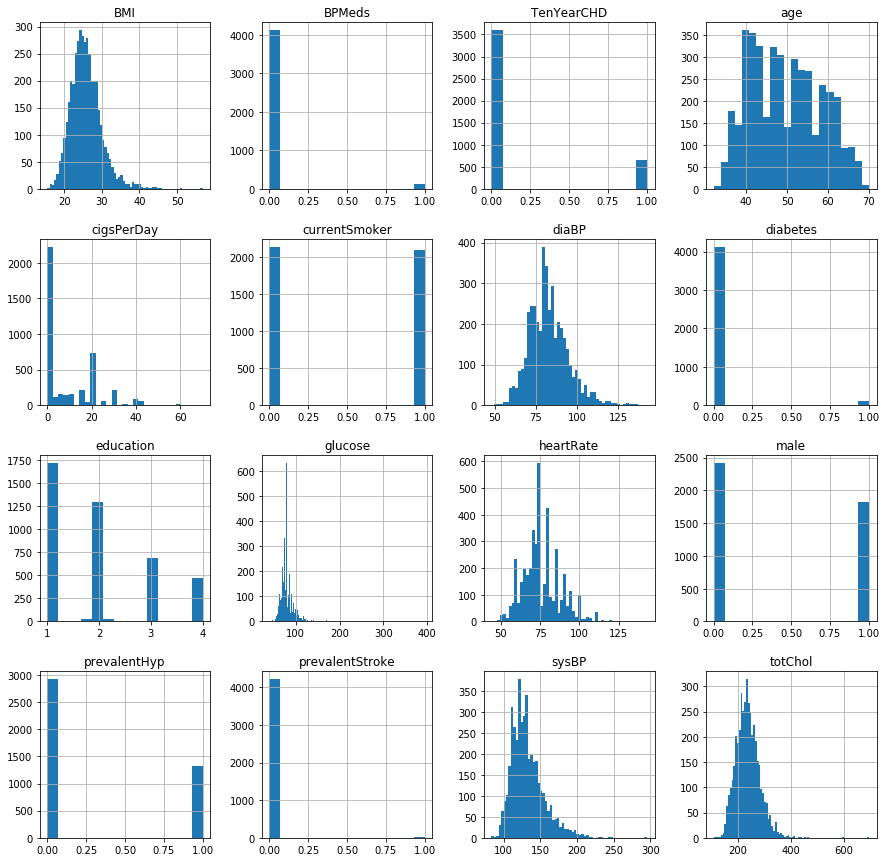

In [20]:
heart_fill.hist(bins='auto', figsize=(15,15))

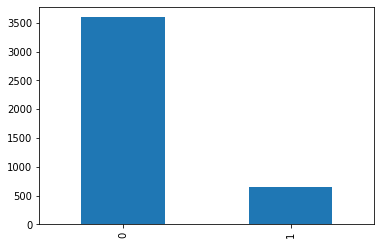

In [21]:
heart_fill['TenYearCHD'].value_counts().plot(x =heart_fill['TenYearCHD'], kind='bar')

In [22]:
heart_fill['TenYearCHD'].value_counts(normalize=True) * 100

0    84.804153
1    15.195847
Name: TenYearCHD, dtype: float64

<b>Distribution of heart disease with gender</b> 

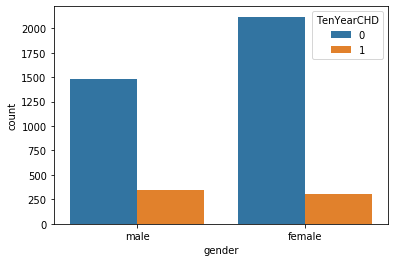

In [23]:
heart_fill_plot = heart_fill.copy()
heart_fill_plot['male']  = heart_fill_plot['male'].replace({0: 'female', 1:'male'})
heart_fill_plot = heart_fill_plot.rename(columns={'male':'gender'})
sns.countplot(data=heart_fill_plot, x='gender', hue='TenYearCHD')

In [24]:
#people who had the chance of having a heart disease in 10 years
heart_fill[heart_fill['TenYearCHD']==1]['male'].value_counts(normalize = True) * 100

1    53.26087
0    46.73913
Name: male, dtype: float64

In [25]:
#people who would not have a heart disease in 10 years
heart_fill[heart_fill['TenYearCHD']==0]['male'].value_counts(normalize = True) * 100

0    58.931553
1    41.068447
Name: male, dtype: float64

- Men have about 13% more chance of having a heart disease in 10 years than women.

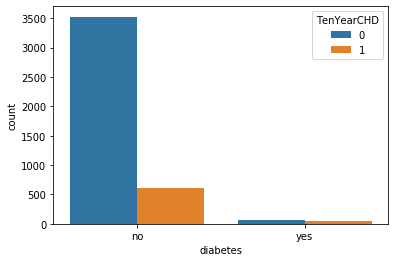

In [26]:
heart_fill_plot['diabetes']  = heart_fill_plot['diabetes'].replace({0: 'no', 1:'yes'})
sns.countplot(data=heart_fill_plot, x='diabetes', hue='TenYearCHD')

In [27]:
#people with diabetes who have the chance of having a heart disease in 10 years
heart_fill[heart_fill['diabetes']==1]['TenYearCHD'].value_counts(normalize = True) * 100

0    63.302752
1    36.697248
Name: TenYearCHD, dtype: float64

In [28]:
#people without diabetes who have the chance of having a heart disease in 10 years
heart_fill[heart_fill['diabetes']==0]['TenYearCHD'].value_counts(normalize = True) * 100

0    85.371761
1    14.628239
Name: TenYearCHD, dtype: float64

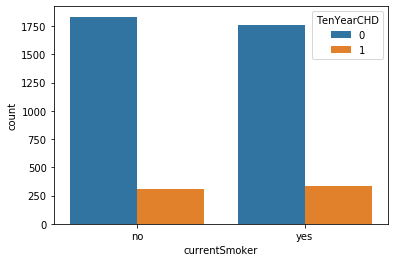

In [29]:
heart_fill_plot['currentSmoker']  = heart_fill_plot['currentSmoker'].replace({0: 'no', 1:'yes'})
sns.countplot(data=heart_fill_plot, x='currentSmoker', hue='TenYearCHD')

In [30]:
heart_fill['age'].value_counts()

40    191
46    182
42    180
41    174
48    173
39    169
44    166
45    162
43    159
52    149
51    146
55    145
38    144
47    141
50    140
53    139
54    132
49    132
57    123
56    123
59    119
58    117
60    111
61    110
63    110
62     99
64     93
37     92
36     84
65     57
67     45
35     42
66     38
68     18
34     18
69      7
33      5
70      2
32      1
Name: age, dtype: int64

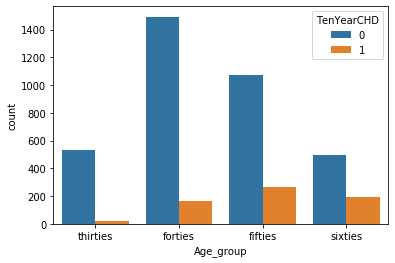

In [31]:
bins= [30,40,50,60,75]
labels = ['thirties','forties','fifties','sixties']

heart_fill_plot['Age_group'] = pd.cut(heart_fill_plot['age'], bins=bins, labels=labels, right=False)

sns.countplot(data=heart_fill_plot, x='Age_group', hue='TenYearCHD')

In [32]:
heart_fill['cigsPerDay'].value_counts()

0.000000     2144
20.000000     734
30.000000     217
15.000000     210
10.000000     143
9.000000      130
5.000000      121
3.000000      100
40.000000      80
1.000000       67
43.000000      56
25.000000      55
18.350605      29
35.000000      22
6.000000       18
2.000000       18
7.000000       12
8.000000       11
60.000000      11
4.000000        9
18.000000       8
17.000000       7
50.000000       6
23.000000       6
11.000000       5
45.000000       3
16.000000       3
13.000000       3
12.000000       3
14.000000       2
19.000000       2
70.000000       1
38.000000       1
29.000000       1
Name: cigsPerDay, dtype: int64

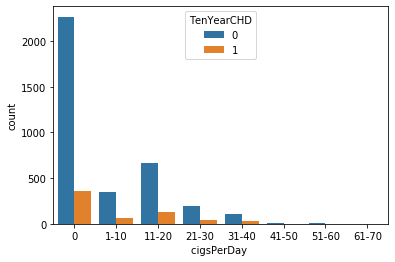

In [33]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0', '1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70']

heart_fill_plot['cigsPerDay '] = pd.cut(heart_fill_plot['cigsPerDay'], bins=bins, labels=labels, right=False)

sns.countplot(data=heart_fill_plot, x='cigsPerDay ', hue='TenYearCHD')

# Model implementation on full dataset

#### features
- male
- age	
- education
- currentSmoker
- cigsPerDay	
- BPMeds	
- prevalentStroke	
- prevalentHyp	
- diabetes	
- totChol	
- sysBP	
- diaBP	
- BMI	
- heartRate	
- glucose	

#### target
- TenYearCHD

In [34]:
predict_80_20(heart_fill, 'TenYearCHD')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score:  0.8490566037735849 
 Confusion matrix:  [[712   7]
 [121   8]]


In [35]:
predict_75_25(heart_fill, 'TenYearCHD')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score:  0.8474842767295597 
 Confusion matrix:  [[1069   10]
 [ 184    9]]


In [36]:
predict_70_30(heart_fill, 'TenYearCHD')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score:  0.8474842767295597 
 Confusion matrix:  [[1069   10]
 [ 184    9]]


# Drop education column

In [37]:
heart_fill_ed = heart_fill.drop(['education'], axis = 1)

In [38]:
predict_80_20(heart_fill_ed, 'TenYearCHD')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score:  0.847877358490566 
 Confusion matrix:  [[712   7]
 [122   7]]


In [39]:
predict_75_25(heart_fill_ed, 'TenYearCHD')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score:  0.8482704402515723 
 Confusion matrix:  [[1069   10]
 [ 183   10]]


In [40]:
predict_70_30(heart_fill_ed, 'TenYearCHD')

Accuracy score:  0.8482704402515723 
 Confusion matrix:  [[1069   10]
 [ 183   10]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Drop BMI

In [41]:
heart_fill_bmi = heart_fill.drop(['BMI'], axis=1)

In [42]:
predict_80_20(heart_fill_bmi, 'TenYearCHD')

Accuracy score:  0.847877358490566 
 Confusion matrix:  [[712   7]
 [122   7]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
predict_75_25(heart_fill_bmi, 'TenYearCHD')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score:  0.8490566037735849 
 Confusion matrix:  [[1070    9]
 [ 183   10]]


In [44]:
predict_70_30(heart_fill_bmi, 'TenYearCHD')

Accuracy score:  0.8490566037735849 
 Confusion matrix:  [[1070    9]
 [ 183   10]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Drop Glucose

In [45]:
heart_fill_gluc = heart_fill.drop(['glucose'], axis=1)

In [46]:
predict_80_20(heart_fill_gluc, 'TenYearCHD')

Accuracy score:  0.8455188679245284 
 Confusion matrix:  [[712   7]
 [124   5]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [47]:
predict_75_25(heart_fill_gluc, 'TenYearCHD')

Accuracy score:  0.8466981132075472 
 Confusion matrix:  [[1068   11]
 [ 184    9]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
predict_70_30(heart_fill_gluc, 'TenYearCHD')

Accuracy score:  0.8466981132075472 
 Confusion matrix:  [[1068   11]
 [ 184    9]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Drop TotChol

In [49]:
heart_fill_chol = heart_fill.drop(['totChol'], axis=1)

In [50]:
predict_80_20(heart_fill_chol, 'TenYearCHD')

Accuracy score:  0.847877358490566 
 Confusion matrix:  [[711   8]
 [121   8]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [51]:
predict_75_25(heart_fill_chol, 'TenYearCHD')

Accuracy score:  0.8466981132075472 
 Confusion matrix:  [[1068   11]
 [ 184    9]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [52]:
predict_70_30(heart_fill_chol, 'TenYearCHD')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score:  0.8466981132075472 
 Confusion matrix:  [[1068   11]
 [ 184    9]]
